### **Thư viện**

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

In [5]:
import nltk
nltk.download("punkt")       # gói chính
nltk.download("punkt_tab")   # gói mới yêu cầu trong NLTK >=3.9


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### **Hàm xử lí văn bản**

In [6]:
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    # Loại bỏ dấu chấm, dấu câu, ký tự đặc biệt
    new_tokens = []
    for token in tokens:
        if re.match(r'^\w+$', token):
            new_tokens.append(token)
    tokens = new_tokens

    # Loại bỏ stopwords (từ vô nghĩa như "the", "is", "and", ...)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = []
    for token in tokens:
        if token not in stop_words:
            filtered_tokens.append(token)
    tokens = filtered_tokens

    # Stemming: đưa từ về gốc (ví dụ: "running" -> "run", "better" -> "better")
    stemmer = PorterStemmer()
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(stemmer.stem(token))
    tokens = stemmed_tokens

    return ' '.join(tokens)

### **Importing Training Data**

In [7]:
link_dataset = {
    "train": "dataset/train.csv",
    "test": "dataset/test.csv",
}

In [8]:
df_original_train = pd.read_csv(link_dataset["train"], header=None, names=("polarity", "title", "text"))

# Lấy mẫu 1 triệu dòng từ dữ liệu gốc để giảm thời gian xử lý
df_train = df_original_train.sample(1000000)

In [9]:
df_train 

,polarity,title,text
642643,1,Would not recommend,I purchased two stands for a musical productio...
170670,2,loved it,Cheaper and bigger then jcpenney...the makeup ...
2339891,1,The worst Bariton-voice with this recording.,"I must really say, that I do not understand th..."
3475386,1,New Video iPod is Buggy,*Update* After writing the 2 star review shown...
1783671,2,"Don't! know the necessity, but fun for a Party","Hit of the baby shower. Most people, just thou..."
...,...,...,...
1894129,1,Very Disappointed In This Crunch Video,On the description on the back of the box it s...
1032007,2,...,"... This fine phone is all digital, not analog..."
599270,1,This phone is terrible!,This phone is a piece of garbage. The most imp...
287989,1,Garbagey and borin',"Hurl tomatoes at this rotten loser, just do an..."


In [10]:
df_original_test = pd.read_csv(link_dataset["test"], header=None, names=("polarity", "title", "text"))
df_test = df_original_test

In [11]:
df_test

,polarity,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


### **Data Pre-Processing**

In [12]:
df_train["clean_text"] = df_train["title"] + " " + df_train["text"]
df_train["clean_text"] = df_train["clean_text"].apply(preprocess_text)
df_train.head()

,polarity,title,text,clean_text
642643,1,Would not recommend,I purchased two stands for a musical productio...,would recommend purchas two stand music produc...
170670,2,loved it,Cheaper and bigger then jcpenney...the makeup ...,love cheaper bigger jcpenney makeup perfect co...
2339891,1,The worst Bariton-voice with this recording.,"I must really say, that I do not understand th...",worst record must realli say understand career...
3475386,1,New Video iPod is Buggy,*Update* After writing the 2 star review shown...,new video ipod buggi updat write 2 star review...
1783671,2,"Don't! know the necessity, but fun for a Party","Hit of the baby shower. Most people, just thou...",know necess fun parti hit babi shower peopl th...


In [13]:
df_test["clean_text"] = df_test["title"] + " " + df_test["text"]
df_test["clean_text"] = df_test["clean_text"].apply(preprocess_text)
df_test.head()

,polarity,title,text,clean_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,great cd love pat one great voic gener listen ...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,one best game music soundtrack game realli pla...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,batteri die within year bought charger jul 200...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,work fine maha energi better check maha energi...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,great review quit bit combo player hesit due u...


### **Split X & y**

In [14]:
X_train = df_train["clean_text"]
y_train = df_train["polarity"]

X_test = df_test["clean_text"]
y_test = df_test["polarity"]

In [15]:
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X train:  (1000000,)
y train:  (1000000,)
X test:  (400000,)
y test:  (400000,)


### **Trích xuất đặc trưng**

##### Trích xuất đặc trưng từ văn bản bằng các phương pháp **BoW**, **TF-IDF** và **Word2Vec**. #####

> ##### **BoW: Bag of Words** #####


In [16]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

> ##### **TF-IDF: Term Frequency - Inverse Document Frequency** #####

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

> ##### **Word Embedding using Word2Vec** #####

In [18]:
vector_size = 100

# Tạo danh sách câu
sentences = []
for sentence in df_train['clean_text']:
    tokens = nltk.word_tokenize(sentence)
    sentences.append(tokens)

# Huấn luyện Word2Vec
word2vec_model = Word2Vec(sentences, min_count=1, vector_size=vector_size)


In [19]:
# Hàm trích xuất embedding cho văn bản
def get_document_embedding(text, word2vec_model, vector_size):
    word_vectors = []
    
    for word in nltk.word_tokenize(text):
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [20]:
# Tạo embeddings cho X_train
train_embeddings = []
for text in X_train:
    embedding = get_document_embedding(text, word2vec_model, vector_size)
    train_embeddings.append(embedding)
X_train_word2vec = np.array(train_embeddings)

# Tạo embeddings cho X_test
test_embeddings = []
for text in X_test:
    embedding = get_document_embedding(text, word2vec_model, vector_size)
    test_embeddings.append(embedding)
X_test_word2vec = np.array(test_embeddings)

In [21]:
scaler = MinMaxScaler()

X_train_word2vec = scaler.fit_transform(X_train_word2vec)
X_test_word2vec = scaler.transform(X_test_word2vec)

### **Multi-Nomial Naive Bayes Model Training**

> ##### **Naive Bayes using BoW** #####

In [22]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [23]:
y_pred_bow = nb_bow.predict(X_test_bow)

In [24]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("BoW Accuracy:", accuracy_bow)
print("Classification Report with BoW:")
print(classification_report(y_test, y_pred_bow))

BoW Accuracy: 0.8366625
Classification Report with BoW:
              precision    recall  f1-score   support

           1       0.83      0.85      0.84    200000
           2       0.84      0.83      0.83    200000

    accuracy                           0.84    400000
   macro avg       0.84      0.84      0.84    400000
weighted avg       0.84      0.84      0.84    400000



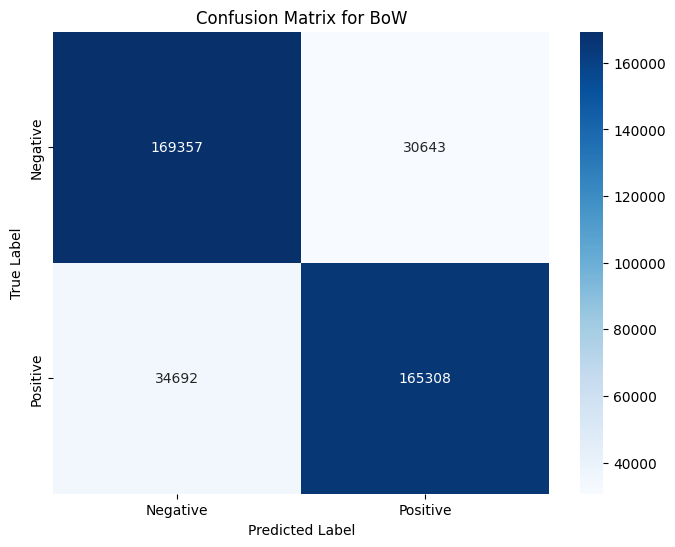

In [25]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for BoW')
plt.show()

> ##### **Naive Bayes using TF-IDF** #####

In [26]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [27]:
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [28]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("TF-IDF Accuracy:", accuracy_tfidf)
print("Classification Report with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF Accuracy: 0.831305
Classification Report with TF-IDF:
              precision    recall  f1-score   support

           1       0.82      0.85      0.83    200000
           2       0.84      0.82      0.83    200000

    accuracy                           0.83    400000
   macro avg       0.83      0.83      0.83    400000
weighted avg       0.83      0.83      0.83    400000



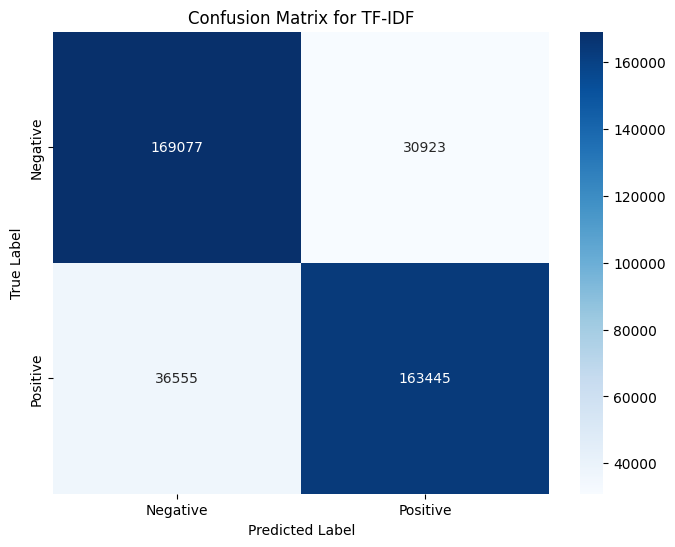

In [29]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

> ##### **Naive Bayes using Word2Vec** #####

In [30]:
nb_word2vec = MultinomialNB()
nb_word2vec.fit(X_train_word2vec, y_train)

MultinomialNB()

In [31]:
y_pred_word2vec = nb_word2vec.predict(X_test_word2vec)

In [32]:
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print("Word2Vec Accuracy:", accuracy_word2vec)
print("Classification Report with Word2Vec:")
print(classification_report(y_test, y_pred_word2vec))

Word2Vec Accuracy: 0.7007175
Classification Report with Word2Vec:
              precision    recall  f1-score   support

           1       0.71      0.68      0.69    200000
           2       0.69      0.73      0.71    200000

    accuracy                           0.70    400000
   macro avg       0.70      0.70      0.70    400000
weighted avg       0.70      0.70      0.70    400000



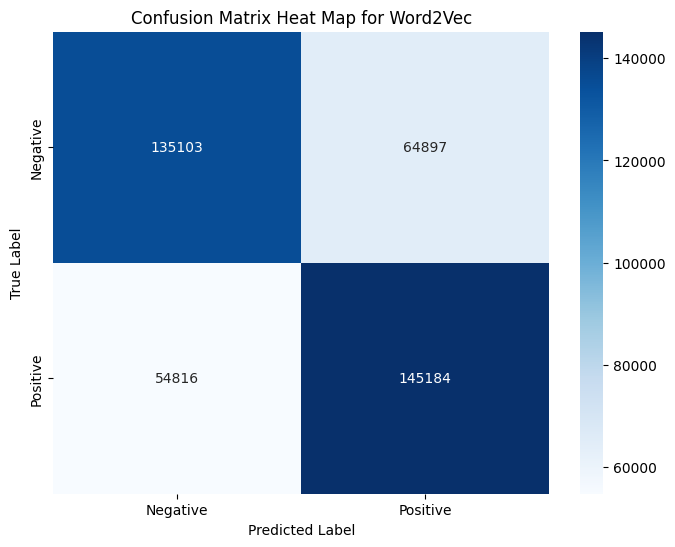

In [33]:
cm_word2vec = confusion_matrix(y_test, y_pred_word2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for Word2Vec')
plt.show()

#### **So sánh**

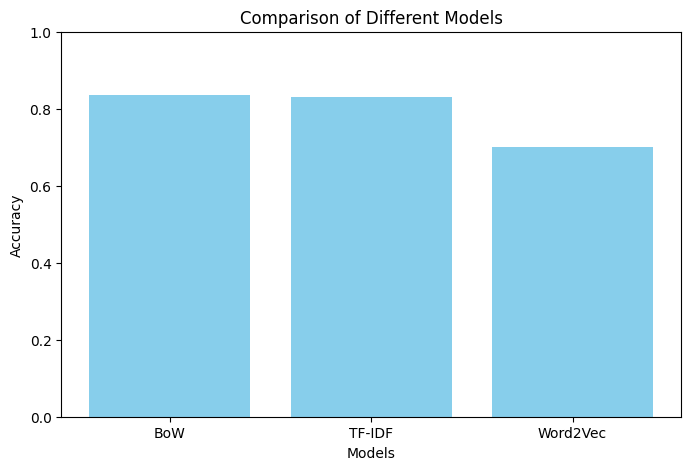

In [37]:
models = ['BoW', 'TF-IDF', 'Word2Vec']
accuracies = [accuracy_bow, accuracy_tfidf, accuracy_word2vec]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

### **Logistic Regression Model Training**

> ##### **Logistic Regression using BoW** #####

In [48]:
lr_bow = LogisticRegression(max_iter=X_train_bow.shape[0])
lr_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000000)

In [49]:
lr_y_pred_bow = lr_bow.predict(X_test_bow)

In [50]:
lr_accuracy_bow = accuracy_score(y_test, lr_y_pred_bow)
print("Logistic Regression with BoW Accuracy:", accuracy_bow)
print("Classification Report with BoW:")
print(classification_report(y_test, lr_y_pred_bow))

Logistic Regression with BoW Accuracy: 0.8842325
Classification Report with BoW:
              precision    recall  f1-score   support

           1       0.89      0.88      0.88    200000
           2       0.88      0.89      0.88    200000

    accuracy                           0.88    400000
   macro avg       0.88      0.88      0.88    400000
weighted avg       0.88      0.88      0.88    400000



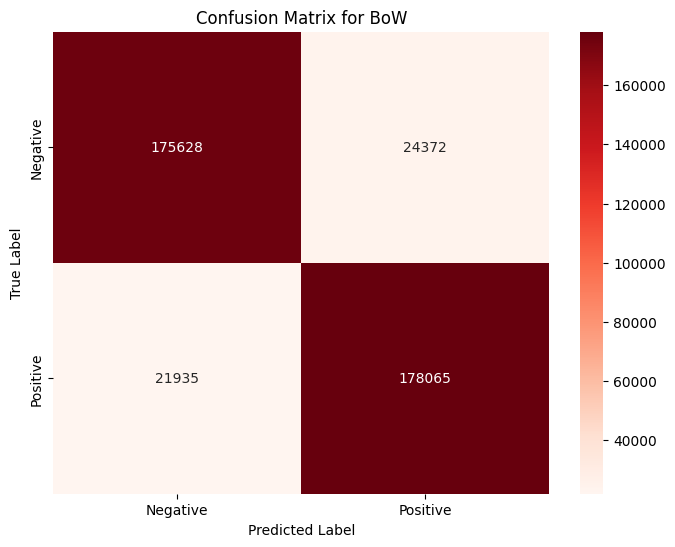

In [51]:
cm_bow = confusion_matrix(y_test, lr_y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for BoW')
plt.show()

> ##### **Logistic Regression using TF-IDF** #####

In [52]:
lr_tfidf = LogisticRegression(max_iter=X_train_tfidf.shape[0])
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000000)

In [53]:
lr_y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

In [55]:
lr_accuracy_tfidf = accuracy_score(y_test, lr_y_pred_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", lr_accuracy_tfidf)
print("Classification Report with TF-IDF:")
print(classification_report(y_test, lr_y_pred_tfidf))

Logistic Regression with TF-IDF Accuracy: 0.88655
Classification Report with TF-IDF:
              precision    recall  f1-score   support

           1       0.89      0.88      0.89    200000
           2       0.88      0.89      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000



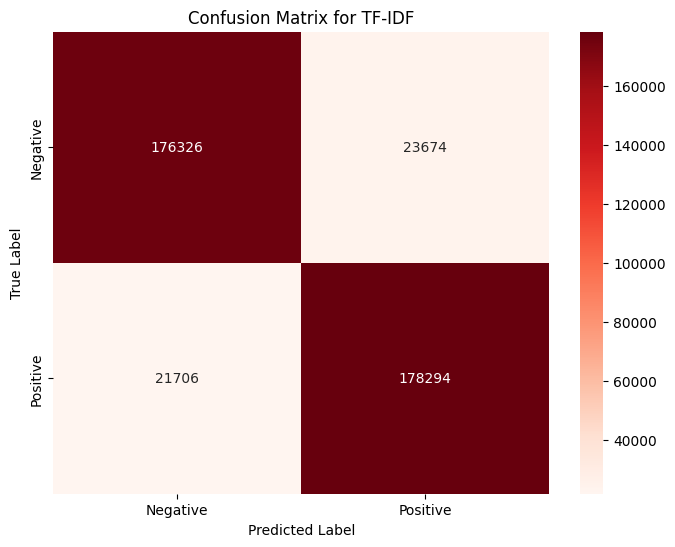

In [57]:
lr_cm_tfidf = confusion_matrix(y_test, lr_y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm_tfidf, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

> ##### **Logistic Regression using Word2Vec** #####

In [58]:
lr_word2vec = LogisticRegression(max_iter=X_train_word2vec.shape[0])
lr_word2vec.fit(X_train_word2vec, y_train)

LogisticRegression(max_iter=1000000)

In [59]:
lr_y_pred_word2vec = lr_word2vec.predict(X_test_word2vec)

In [61]:
lr_accuracy_word2vec = accuracy_score(y_test, lr_y_pred_word2vec)
print("Logistic Regression with Word2Vec Accuracy:", lr_accuracy_word2vec)
print("Classification Report with Word2Vec:")
print(classification_report(y_test, lr_y_pred_word2vec))

Logistic Regression with Word2Vec Accuracy: 0.85964
Classification Report with Word2Vec:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86    200000
           2       0.86      0.86      0.86    200000

    accuracy                           0.86    400000
   macro avg       0.86      0.86      0.86    400000
weighted avg       0.86      0.86      0.86    400000



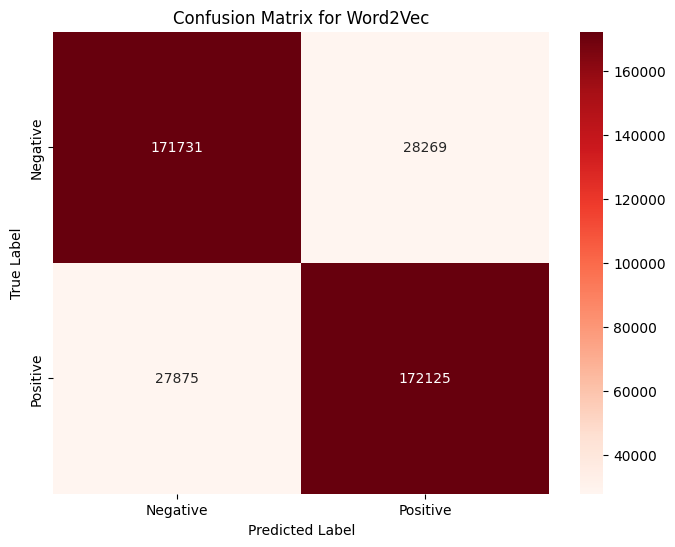

In [62]:
lr_cm_word2vec = confusion_matrix(y_test, lr_y_pred_word2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm_word2vec, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Word2Vec')
plt.show()

#### **So sánh** ####

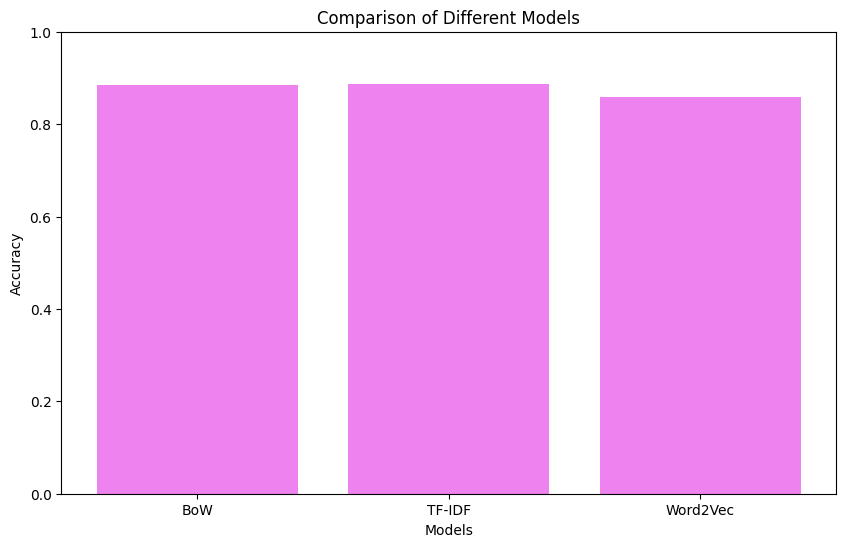

In [63]:
lr_models = ['BoW', 'TF-IDF', 'Word2Vec']
lr_accuracies = [lr_accuracy_bow, lr_accuracy_tfidf, lr_accuracy_word2vec]

plt.figure(figsize=(10, 6))
plt.bar(lr_models, lr_accuracies, color='violet')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

### **Tải mô hình**

In [64]:
import joblib

In [70]:
# Lưu objects
joblib.dump(bow_vectorizer, "bow_vectorizer.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [72]:
# Lưu mô hình Naive Bayes cho PP BoW
joblib.dump(nb_bow, "naive_bayes_bow.pkl")

['naive_bayes_bow.pkl']

In [71]:
# Lưu mô hình Naive Bayes cho PP TF-IDF
joblib.dump(nb_tfidf, "naive_bayes_tfidf.pkl")

['naive_bayes_tfidf.pkl']

In [73]:
# Lưu mô hình Logistic Regression cho PP BoW
joblib.dump(lr_bow, "logistic_regression_bow.pkl")

['logistic_regression_bow.pkl']

In [74]:
# Lưu mô hình Logistic Regression cho TF-IDF
joblib.dump(lr_tfidf, "logistic_regression_tfidf.pkl")

['logistic_regression_tfidf.pkl']